In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import cv2
import scipy
from sklearn.preprocessing import LabelEncoder

# BASE_PATH = '/home/ec2-user/cell_classifier/'
BASE_PATH = '../'

In [3]:
def get_filename_for_index(index):
    PREFIX = 'images/BloodImage_'
    num_zeros = 5 - len(index)
    path = '0' * num_zeros + index
    return PREFIX + path + '.jpg'

In [4]:
reader = csv.reader(open(BASE_PATH + 'labels.csv'))
# skip the header
next(reader)

X = []
y = []

for row in reader:
    label = row[2]
    if len(label) > 0 and label.find(',') == -1:
        y.append(label)

y = np.asarray(y)

In [5]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

In [6]:
encoded_y

array([4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 4, 4, 4, 4, 3, 4, 1, 4, 4, 2, 2, 4, 1,
       4, 1, 1, 4, 4, 4, 4, 4, 1, 2, 2, 4, 3, 1, 1, 1, 4, 2, 1, 1, 4, 4, 4,
       2, 2, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 4, 4, 4, 1, 2, 4, 4, 4, 4,
       4, 3, 4, 4, 1, 2, 1, 4, 4, 1, 1, 1, 1, 1, 4, 2, 1, 1, 3, 4, 1, 1, 1,
       3, 2, 4, 4, 1, 4, 3, 2, 1, 4, 4, 4, 3, 4, 0, 1, 2, 1, 4, 1, 1, 2, 1,
       4, 1, 1, 4, 1, 2, 1, 4, 1, 1, 4, 2, 1, 4, 1, 4, 1, 4, 4, 1, 4, 4, 4,
       4, 4, 0, 4, 4, 4, 1, 4, 4, 1, 4, 1, 1, 1, 4, 4, 2, 4, 3, 4, 4, 4, 1,
       4, 1, 4, 1, 4, 2, 4, 1, 4, 4, 2, 4, 4, 4, 4, 2, 4, 1, 1, 4, 4, 4, 2,
       3, 1, 4, 1, 2, 4, 4, 3, 2, 4, 4, 1, 4, 4, 1, 2, 4, 4, 4, 4, 4, 4, 4,
       1, 4, 1, 2, 3, 4, 4, 2, 1, 4, 1, 3, 4, 2, 1, 4, 4, 4, 1, 2, 1, 4, 4,
       1, 2, 4, 1, 3, 4, 4, 3, 4, 2, 1, 4, 4, 4, 1, 1, 3, 1, 4, 4, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 2, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3, 1, 4, 4, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 1, 1, 4, 2, 4,
       4, 4,

In [8]:
counts = np.bincount(encoded_y)
print(counts)

[  3  88  33  21 207]


In [11]:
percentages = 100 * counts/sum(counts)

In [12]:
percentages

array([  0.85227273,  25.        ,   9.375     ,   5.96590909,  58.80681818])

In [13]:
fig, ax = plt.subplots()
plt.bar(list(range(5)), percentages)
ax.set_xticklabels(('', 'Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil'))
ax.set_ylabel('Percentage')

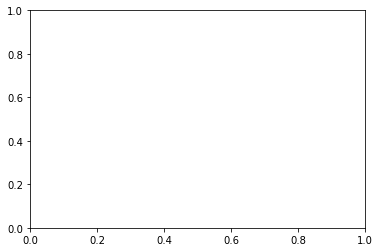

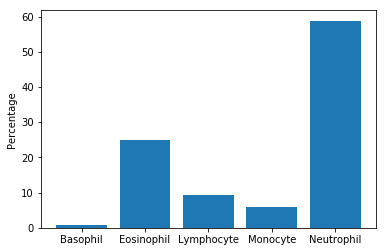

In [14]:
plt.show()

In [11]:
encoder.inverse_transform(list(range(5)))

array(['BASOPHIL', 'EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'], 
      dtype='<U10')